# Assignment 06
## Learning outcomes
This Assignment integrates knowledge and skills acquired in the last 5 Assignments – and extends it to Power analysis and Bayesian inference. The Assignment simultaneously serves as a practice for the midterm, which will be comparable in scope, length, and difficulty. 
## Preliminaries
Sets up the environment by importing pandas, numpy, matplotlib, and seaborn. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). Preliminaries are already taken care off in the workbook. 

In [49]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sns

## Task 1: Power and Bayesian hypothesis testing (40pt)
### Question 1 (10pt)
For this tasks we will use the medical advisor example from last assignment. You are thinking about hiring a medical advisor for a liver transplant that had 100 cases and only 5 complications. The normal base rate of complications in North America is 10%. You are trying to decide between two hypotheses: 

H0: The Consultant does not impact the complication rate (i.e. p=0.1)

H1: The Consultant halves the complication rate (i.e. p=0.05)

Write a function that generates data (using the Monte-carlo function from last assignment) assuming the H0 and assuming the H1. The function should plot an overlapped histogram of the two distributions (see lecture slides). The function should then calculate and print out the p-value and the power for a given number of observed complications. Then run the function to calculate the probability that you falsely reject the Null-hypothesis after observing 5 complications. 

In [83]:
def monteCarloSim(p,N,numIter):
    numHeads = np.array(range(numIter),dtype = 'float64')

    for i in range(numIter):
        options = [0,1]
        probDist = [1-p,p]
        
        a=np.random.choice(options,N,p=probDist)
    
        numHeads[i]=a.sum()
    return numHeads

def monteCarloTest(H0prob,H1prob,N,numHeads):
    simH0 = monteCarloSim(H0prob,N,1000)
    simH1 = monteCarloSim(H1prob,N,1000)

    
    plt.hist(simH0, color = "b", alpha = 0.5)
    plt.hist(simH1, color = "r", alpha = 0.5)
    plt.axvline(x = numHeads, color = "green") 
    
    #p-value
    p_value = sum(simH0<=numHeads)/len(simH0)
    print('P-value of the randomisation test is p_value = ',p_value)
    
    #power
    power = sum(simH1<=numHeads)/len(simH1)
    print('Power of the randomisation test is power = ', power)

    
    return p_value, power


P-value of the randomisation test is p_value =  0.059
Power of the randomisation test is power =  0.621
(0.059, 0.621)


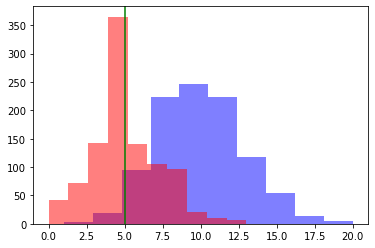

In [106]:
test = monteCarloTest(0.1, 0.05, 100, 5)
print(test)

### Question 2 (8 pt)
According to current statistical standards (i.e., a critical p-value of 5%), would the decision to reject the Null be appropriate? How does the power calculation influence your thinking about this decision? 

Upon running the MonteCarloTest several times, the P-value seems to be around 0.054, which, accordint to current statistical standards, is right above the critical p-value of 5%, meaning that we cannot confidently reject the null hypothesis. Additionally, the power supports this decision, as it is lower than 80% (generally around 63%), and this means that it has a lower probability of rejecting the null hypothesis given the alternate hypothesis is true. 

### Question 3 ( 7 pt)
How the p-value and the power change if you decided to hire the advisor if there were 7 or less complications in 100 cases? Written answer: Would this be a better decision criterion than 5 case? 

When we put 7 complications in the simulation, we get a greater p value an (0.22) and a greater power (0.85). This is because the less complications there are, the less the p value is (greater significance to reject H0 and accept that the consultant will half complication rate). Therefore, the greater the complications, the less certain we are that the consultant will half the complication rate. 
Because of this, 7 or less complications would be a better decision criterion, as we can easily see that there is not enough evidence to support rejecting the null hypothesis. 

### Question 4 (10pt)
Write a function that again simulates data both under the H0 and H1, using similar code as in Question 1. Then calculate the Bayes-Factor BF(H1/H0). Finally report the posterior probability of the H1, assuming the prior probability was 0.5. 

In [132]:
def monteCarloTest_BF(H0prob,H1prob,N,numHeads):
    simH0 = monteCarloSim(H0prob,N,1000)
    simH1 = monteCarloSim(H1prob,N,1000)

    
    plt.hist(simH0, color = "b", alpha = 0.5)
    plt.hist(simH1, color = "r", alpha = 0.5)
    plt.axvline(x = numHeads, color = "green") 
    
    #p-value
    p_value = sum(simH0<=numHeads)/len(simH0)
    print('P-value of the randomisation test is p_value = ',p_value)
    
    #power
    power = sum(simH1<=numHeads)/len(simH1)
    print('Power of the randomisation test is power = ', power)
    
    #Bayes-Factor
    BF10 = sum((simH1 == numHeads)/len(simH0))/(sum((simH0 == numHeads)/len(simH1)))
    print('Bayes-Factor is = ',BF10)

    #BF10 = p(Data|H1)/p(Data|H0)
    #BF10 = p1/p0
    #p0 = prob observed data given that null hypothesis is true (p-value)
    #p1 = prob of observed data given that alternative is true (power)
    
    
    #find posterior of H1
    prior = 0.5 #prior is the same for H0 and H1
    
    posterior1 = (prior*power)/(prior*power + prior*p_value)
    print('Posterior probability is = ',posterior1)


    
    return p_value, power

P-value of the randomisation test is p_value =  0.051
Power of the randomisation test is power =  0.625
Bayes-Factor is =  5.645161290322581
Posterior probability is =  0.9245562130177514


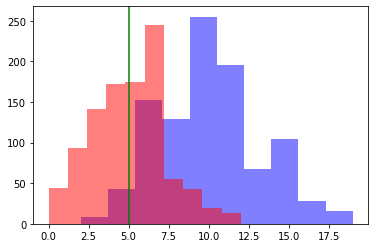

In [133]:
test = monteCarloTest_BF(0.1, 0.05, 100, 5)

### Question 5: (5pt)
How would you interpret the BF and the posterior probability?

BF is how much more likely the probability of observed data given that alternative is true, is than the probability of observed data given that the null is true. In this case, the alternate is 5.5 times more likely than the null. 
Posterior probability in this case is the probability of the alternative hypothesis occuring (consultant does half the rate) given our data. Thus this number of ~92% strongly indicates that based on this data, the alternate hypothesis is more probable.

## Task 2: The relation between smoking and premature birth (25pt)
The data for this task come from a random sample of 150 births from the birth records in the US state of North Carolina in 2004. The data contains 50 records from mothers that self-identified as having smoked on average more than 2 cigarettes per week during the pregnancy (smokers) and 100 mothers that smoked not at all or less than 2 cigarettes per week during the pregnancy. 

The data frame has 150 observations with the following 9 variables:

- fAge: Father’s age.
- mAge: Mother’s age.
- weeks:  Weeks at which the mother gave birth.
- premature: Indicates whether the baby was premature or not.
- visits: Number of hospital visits.
- gained: Weight gained by mother (lbs) 
- weight: Birth weight of the baby (lbs) 
- sexBaby: Gender of the baby 
- smoke:  Whether or not the mother self-reported to be a smoker.

### Question 1 (8 pt) 
Calculate and report the mean birth weight of babies born by smoking and by non-smoking moms. Generate a violinplot of birth weight, with separate violins for smokers and non-smokers. Make sure that the two violins are plotted in the same graph, so the two groups can be directly compared. Written answer: What do you observe in terms of means and median for the two groups? Is the distribution symmetric, left-skewed, or right-skewed? 

In [140]:
#import dataframe
df = pd.read_csv('births.csv')


smoker baby weight is =  6.716599999999999
nonsmoker baby weight is =  7.1882


<AxesSubplot:xlabel='smoke', ylabel='weight'>

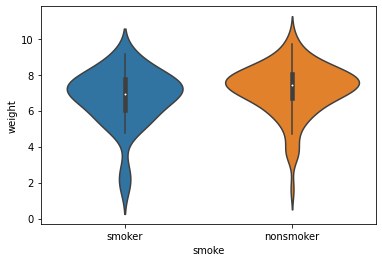

In [142]:
sg_weight = df['weight'].groupby(df['smoke'])
smoker_weight = sg_weight.get_group('smoker')
nonsmoker_weight = sg_weight.get_group('nonsmoker')
m_sw = smoker_weight.mean()
m_nsw = nonsmoker_weight.mean()
print('smoker baby weight is = ', m_sw)
print('nonsmoker baby weight is = ', m_nsw)
sns.violinplot(x = 'smoke', y = 'weight', data = df)

The smoker baby weight on average is lower than the nonsmoker baby weight. Both are left skewed, as the median is greater than the mean for each one. The smoker weight also seem to have way more under 4 pound babies than nonsmoker babies.

### Question 2 (10pt)
As a researcher, you want to test the idea that smoking during pregnancy has *some influence* on the baby's birthweight. Formulate Null- and Alternative hypothesis (using =, >, <, and unequal signs). Write a function that returns the difference of the average birth weights between babies of smoker and non-smokers. Use a randomization test to test whether (and with what Type-I error) you can reject the Null-hypothesis. Do you need to use a one-sided or two-sided test? Written answer: What is your conclusion? 

Null: nonsmoker babyweight <= smoker babyweight


Alternative: nonsmoker babyweight > smoker babyweight

In [224]:
def avg_weight_diff(D, genre='weight'):
    
    sg_weight = D[genre].groupby(D['smoke'])
    smoker_weight = sg_weight.get_group('smoker')
    nonsmoker_weight = sg_weight.get_group('nonsmoker')
    m_sw = smoker_weight.mean()
    m_nsw = nonsmoker_weight.mean()
    diff = m_nsw - m_sw
    return diff

In [261]:
def perm_test(data, fcn, n_iter=1000, genre='weight', shuffle='smoke'):
    stat =  np.array(range(n_iter),dtype = 'float64')
    for i in range(n_iter):
        S=data.copy()
        x = np.array(range(len(data.index)))
        np.random.shuffle(x)
        y = S[shuffle].iloc[x]
        y = y.reset_index(drop=True)
        S[shuffle]=y
        
        #2. Calculate test statistics 
        stat[i] = fcn(S)

    # 3. Caluclate the real test statistic 
    realstat = fcn(data)
    # 4. Calculate P value
    p_val=sum(stat>=realstat)/len(stat)
    print('the P Value is = ',p_val)
    return stat

test = perm_test(df,avg_weight_diff)
#print(test)

the P Value is =  0.022


as the p value is consistently less than 0.05, we can reject the null hypothesis. This is one sided since we want to see if the alternate hypothesis of nonsmoker baby weight being large than smoker babyweight. 

### Question 3 (7 pt)
You want to test the directed hypothesis that smoking is associated with a lower birth weight. Again, formulate Null and Alternative hypothesis. Use again a randomization test to see if you have evidence to reject the Null. Written answer: what is your conclusion? 

Null Hypothesis: Birthweight (smoker) >= Birthweight (non-smoker)
Alt. Hypothesis: Birthweight (smoker) < Birthweight (non-smoker)

Same conclusions as question 3. 

## Task 3: Bayesian hypothesis test of smoke-related reduction in birth weight. (35pt)
### Question 1 (10pt)
Determine and report the approximate standard deviation of the mean difference in birth weight under the Null hypothesis (birth weights for smokers and non-smokers are equal) directly from the samples of the randomization test performed in Question 2 and 3. 

In [257]:
def stdv():
    test = perm_test(df,avg_weight_diff)
    std = test.std()
    print('the standard deviation is: ',std)
    return std
test = stdv()

the P Value is =  0.028
the standard deviation is:  0.2566119681623597


### Question 2 (10pt)
An average drop of birthweight of 0.5lbs is considered to be clinically significant risk. Use a Bayesian hypothesis test to determine how strong the evidence is that smoking is associated with a clinically significant reduction in birth weight. Based on the standard deviation of the mean difference from the randomization test in Task 2, you decide that it is appropriate to use a normal approximation for the average weight difference, both under the H1 and H0. Further, assume the standard error of the mean difference of 0.25 both for the H1 and the H0. Calculate the probability density for the real mean difference under H1 and H0. Then calculate and report the Bayes Factor of the H1 over the H0. What can you conclude from this result?  

In [275]:
def Bayesian():
    #histplot
    
    sns.distplot(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')
    
H0_dist = perm_test(df,avg_weight_diff)
TS_std = np.std(H0_dist)
a = avg_weight_diff(df)
p0 = ss.norm.pdf(a, 0, TS_std) 
print("the null p0 = ", p0) 
# Calculate BF10
p1 = ss.norm.pdf(a,0.25, TS_std)
print("the alternate p1 = ", p1)

BF10 = p1/p0
print("BF10 = ",BF10)

the P Value is =  0.037
the null p0 =  0.26182376969334
the alternate p1 =  1.0797566299316184
BF10 =  4.123982445124363


therefore, i can conclude that there is strong evidence to favour H1 over the H0.

### Question 3 (7pt)
What is the posterior probability of the H1, assuming that a-priori you had the belief that there was a 70% chance that smoking may reduce the birth weight by 0.5lb.  Use the results from task 3 question 2. Show clearly the formula used to calculate the posterior probability. Written answer: What is the meaning of this posterior probability? How does the meaning differ from the p-value calculated under Task 2, Question 3? 

In [279]:
prior0 = 0.3
prior1 = 0.7
posterior1 = (prior1*p1)/(prior1*p1 + prior0*p0)
print(posterior1)

0.9058613164255623


this posterior probability shows us that there is a 90% chance that the alternative hypothesis occurs given the data presented.

this differs from the p value since p value provides the probability, whereas posterior provides confidence.

### Question 4 (8pt)
A news outlet picks up your result, saying that "the study shows that smoking among US women causes an average decrease in birth weight of 0.4lbs." Can you draw this conclusion from the data? What are two possible problems with such claim?

You cannot draw this conclusion, the data only supports the hypothesis that the average birthweight for a non smoker's child will be greater than the average birthweight for a smoker's child. Thus the two problems is the 0.4lbs, since thats not what the data indicates, and the data only implied correlation, not that it directly caused it, there could be other factors. 